In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten




In [11]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten for sklearn models
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

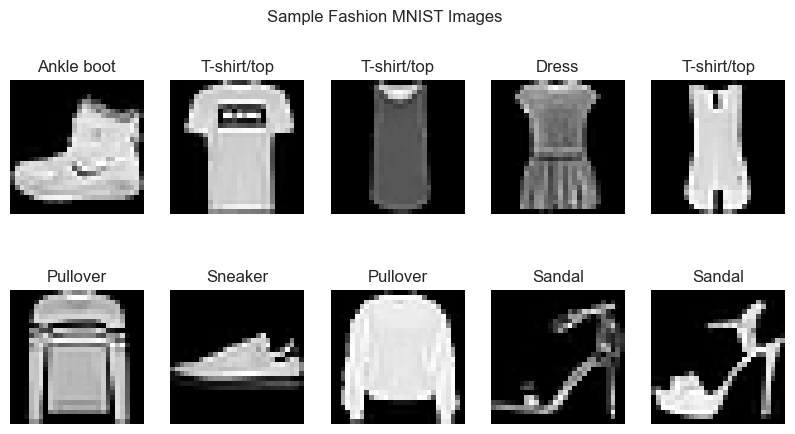

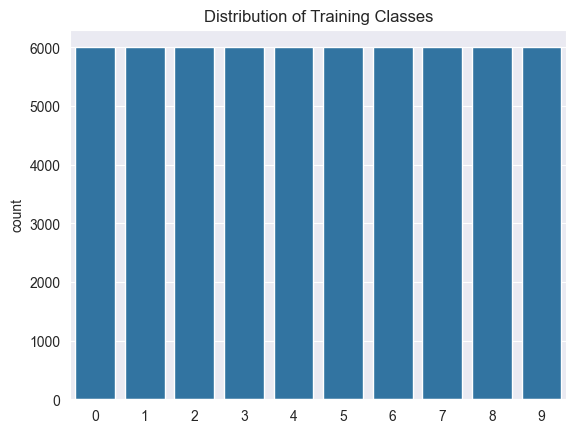

In [12]:
# Show sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images")
plt.show()

# Distribution of training classes
sns.countplot(x=y_train)
plt.title("Distribution of Training Classes")
plt.show()


In [13]:
# Reduce dimensionality from 784 -> 100
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

print("Explained variance ratio (first 10 comps):", pca.explained_variance_ratio_[:10])


Explained variance ratio (first 10 comps): [0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267]


In [14]:
results = {}

# --- SVM ---
print("Training SVM...")
svm_clf = SVC(kernel='rbf')
svm_clf.fit(x_train_pca[:10000], y_train[:10000])  # subset for speed
svm_preds = svm_clf.predict(x_test_pca)
results['SVM'] = accuracy_score(y_test, svm_preds)

# --- Random Forest ---
print("Training Random Forest...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train_pca[:20000], y_train[:20000])
rf_preds = rf_clf.predict(x_test_pca)
results['RandomForest'] = accuracy_score(y_test, rf_preds)

# --- Neural Network ---
print("Training Neural Network...")
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

nn_preds = np.argmax(model.predict(x_test), axis=1)
results['NeuralNetwork'] = accuracy_score(y_test, nn_preds)


Training SVM...
Training Random Forest...
Training Neural Network...


C:\Users\Asus\Desktop\upes\clgwork\5th SEM\DataVisualization_sem5\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 - 3s - 6ms/step - accuracy: 0.8175 - loss: 0.5190 - val_accuracy: 0.8622 - val_loss: 0.3831
Epoch 2/5
422/422 - 2s - 4ms/step - accuracy: 0.8660 - loss: 0.3699 - val_accuracy: 0.8728 - val_loss: 0.3569
Epoch 3/5
422/422 - 2s - 4ms/step - accuracy: 0.8784 - loss: 0.3315 - val_accuracy: 0.8767 - val_loss: 0.3546
Epoch 4/5
422/422 - 2s - 4ms/step - accuracy: 0.8880 - loss: 0.3051 - val_accuracy: 0.8878 - val_loss: 0.3135
Epoch 5/5
422/422 - 2s - 4ms/step - accuracy: 0.8952 - loss: 0.2870 - val_accuracy: 0.8837 - val_loss: 0.3228
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


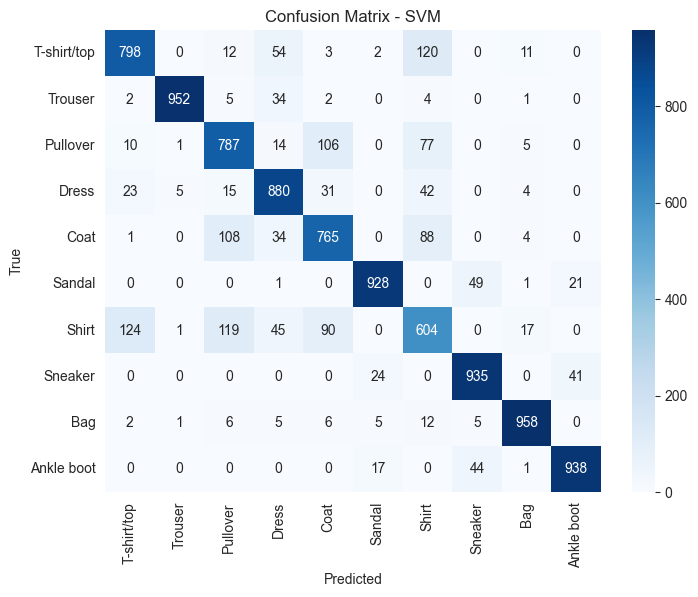


Classification Report - SVM
              precision    recall  f1-score   support

 T-shirt/top     0.8313    0.7980    0.8143      1000
     Trouser     0.9917    0.9520    0.9714      1000
    Pullover     0.7481    0.7870    0.7671      1000
       Dress     0.8247    0.8800    0.8515      1000
        Coat     0.7627    0.7650    0.7639      1000
      Sandal     0.9508    0.9280    0.9393      1000
       Shirt     0.6378    0.6040    0.6204      1000
     Sneaker     0.9051    0.9350    0.9198      1000
         Bag     0.9561    0.9580    0.9570      1000
  Ankle boot     0.9380    0.9380    0.9380      1000

    accuracy                         0.8545     10000
   macro avg     0.8546    0.8545    0.8543     10000
weighted avg     0.8546    0.8545    0.8543     10000

--------------------------------------------------------------------------------


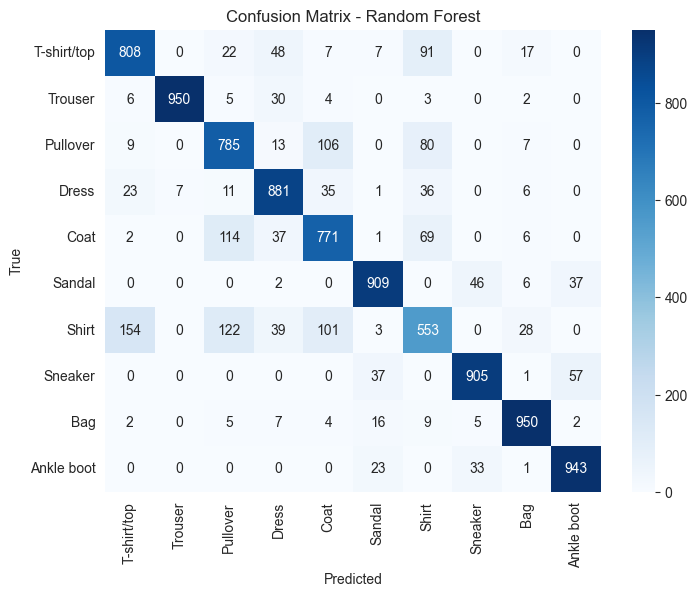


Classification Report - Random Forest
              precision    recall  f1-score   support

 T-shirt/top     0.8048    0.8080    0.8064      1000
     Trouser     0.9927    0.9500    0.9709      1000
    Pullover     0.7378    0.7850    0.7607      1000
       Dress     0.8335    0.8810    0.8566      1000
        Coat     0.7500    0.7710    0.7604      1000
      Sandal     0.9117    0.9090    0.9104      1000
       Shirt     0.6576    0.5530    0.6008      1000
     Sneaker     0.9151    0.9050    0.9100      1000
         Bag     0.9277    0.9500    0.9387      1000
  Ankle boot     0.9076    0.9430    0.9250      1000

    accuracy                         0.8455     10000
   macro avg     0.8438    0.8455    0.8440     10000
weighted avg     0.8438    0.8455    0.8440     10000

--------------------------------------------------------------------------------


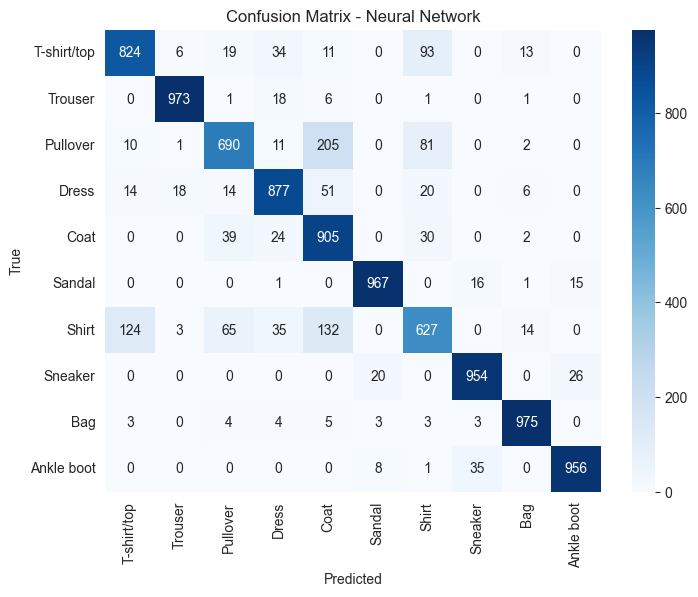


Classification Report - Neural Network
              precision    recall  f1-score   support

 T-shirt/top     0.8451    0.8240    0.8344      1000
     Trouser     0.9720    0.9730    0.9725      1000
    Pullover     0.8293    0.6900    0.7533      1000
       Dress     0.8735    0.8770    0.8752      1000
        Coat     0.6882    0.9050    0.7819      1000
      Sandal     0.9689    0.9670    0.9680      1000
       Shirt     0.7325    0.6270    0.6756      1000
     Sneaker     0.9464    0.9540    0.9502      1000
         Bag     0.9615    0.9750    0.9682      1000
  Ankle boot     0.9589    0.9560    0.9574      1000

    accuracy                         0.8748     10000
   macro avg     0.8776    0.8748    0.8737     10000
weighted avg     0.8776    0.8748    0.8737     10000

--------------------------------------------------------------------------------


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, title):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    # Performance Metrics
    print(f"\nClassification Report - {title}")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))
    print("-" * 80)

# Evaluate all models
evaluate_model(y_test, svm_preds, "SVM")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, nn_preds, "Neural Network")


In [16]:
print("Model Accuracies:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with accuracy {results[best_model]:.4f}")


Model Accuracies:
SVM: 0.8545
RandomForest: 0.8455
NeuralNetwork: 0.8748
Best Model: NeuralNetwork with accuracy 0.8748


In [17]:
import joblib

# Save SVM model
joblib.dump(svm_clf, "svm_fashion.pkl")

# Save Random Forest model
joblib.dump(rf_clf, "rf_fashion.pkl")

# Save Neural Network (Keras) differently:
# Keras models are usually saved in HDF5 (.h5) or TensorFlow SavedModel format
model.save("nn_fashion.h5")

print("Models saved successfully: svm_fashion.pkl, rf_fashion.pkl, nn_fashion.h5")


Models saved successfully: svm_fashion.pkl, rf_fashion.pkl, nn_fashion.h5
